In [31]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold

import sklearn.metrics as metrics

from imblearn.over_sampling import SMOTE


In [2]:
# Demographics
dem = pd.read_csv("../data/1_demographics/DEMO_J.csv", index_col = 0)
dem["SEQN"] = dem["SEQN"].map(int)
dem.set_index("SEQN", inplace = True)
dem.head(2)

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,...,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
SEQN,,,,,,,,,,,,,,,,,,,,,
93703,10,2,2,2,NaN,5,6,2.0,27.0,NaN,...,3.0,1.0,3.0,9246.491865,8539.731348,2,145,15.0,15.0,5.0
93704,10,2,1,2,NaN,3,3,1.0,33.0,NaN,...,3.0,1.0,2.0,37338.768343,42566.614750,1,143,15.0,15.0,5.0


In [3]:
# Diet
diet = pd.read_csv("../data/2_dietary/DR1TOT_J.csv", index_col = 0)
diet["SEQN"] = diet["SEQN"].map(int)
diet.set_index("SEQN", inplace = True)
diet.head(2)

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MRESP,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
SEQN,,,,,,,,,,,,,,,,,,,,,
93703,0.000000,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704,81714.005497,82442.869214,1,49.0,2.0,2.0,7.0,2.0,1.0,2.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [4]:
# Laboratory
hdl = pd.read_csv("../data/4_laboratory/HDL_J.csv", index_col = 0)
hdl["SEQN"] = hdl["SEQN"].map(int)
hdl.set_index("SEQN", inplace = True)

trigly = pd.read_csv("../data/4_laboratory/TRIGLY_J.csv", index_col = 0)
trigly["SEQN"] = trigly["SEQN"].map(int)
trigly.set_index("SEQN", inplace = True)

tchol = pd.read_csv("../data/4_laboratory/TCHOL_J.csv", index_col = 0)
tchol["SEQN"] = tchol["SEQN"].map(int)
tchol.set_index("SEQN", inplace = True)

laboratory = pd.merge(hdl, trigly, how = "outer", left_index = True, right_index = True)
laboratory = pd.merge(laboratory, tchol, how = "outer", left_index = True, right_index = True)

laboratory.head(2)

,LBDHDD,LBDHDDSI,WTSAF2YR,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,LBDLDLM,LBDLDMSI,LBDLDLN,LBDLDNSI,LBXTC,LBDTCSI
SEQN,,,,,,,,,,,,,
93705,60.0,1.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.0,4.06
93706,47.0,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.0,3.83


In [5]:
# Questionnaire: Medical Condition
med_cond = pd.read_csv("../data/5_questionnaire/MCQ_J.csv", index_col = 0)
med_cond["SEQN"] = med_cond["SEQN"].map(int)
med_cond.set_index("SEQN", inplace = True)
med_cond.head(2)

,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,AGQ030,MCQ053,MCQ080,MCQ092,MCD093,...,MCQ300A,MCQ366A,MCQ366B,MCQ366C,MCQ366D,MCQ371A,MCQ371B,MCQ371C,MCQ371D,OSQ230
SEQN,,,,,,,,,,,,,,,,,,,,,
93703,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Joining everything together

full_data = pd.merge(dem, diet, how = "outer", left_index = True, right_index = True)
full_data = pd.merge(full_data, laboratory, how = "outer", left_index = True, right_index = True)
full_data = pd.merge(full_data, med_cond, how = "outer", left_index = True, right_index = True)

full_data.head()

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,...,MCQ300A,MCQ366A,MCQ366B,MCQ366C,MCQ366D,MCQ371A,MCQ371B,MCQ371C,MCQ371D,OSQ230
SEQN,,,,,,,,,,,,,,,,,,,,,
93703,10,2,2,2,NaN,5,6,2.0,27.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704,10,2,1,2,NaN,3,3,1.0,33.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93705,10,2,2,66,NaN,4,4,2.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0
93706,10,2,1,18,NaN,5,6,2.0,222.0,2.0,...,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
93707,10,2,1,13,NaN,5,7,2.0,158.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
full_data.shape

(9254, 300)

In [8]:
columns = ["RIAGENDR", "DMDHRAGZ", "DR1TALCO", "DR1TCHOL", "DR1TFA", "DR1TFIBE", "DR1TPFAT", "DR1TSFAT", "DR1TSUGR", "DR1TTFAT", "MCD180A", "MCD180B", "MCD180C", "MCD180D", "MCD180E", "MCD180F", "MCD240A", "MCD240B", "MCD240C", "MCQ010"]

df = full_data[columns]
df.head(2)

,RIAGENDR,DMDHRAGZ,DR1TALCO,DR1TCHOL,DR1TFA,DR1TFIBE,DR1TPFAT,DR1TSFAT,DR1TSUGR,DR1TTFAT,MCD180A,MCD180B,MCD180C,MCD180D,MCD180E,MCD180F,MCD240A,MCD240B,MCD240C,MCQ010
SEQN,,,,,,,,,,,,,,,,,,,,
93703,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
93704,1,2,0.0,144.0,33.0,5.9,12.506,11.372,76.97,43.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9254 entries, 93703 to 102956
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  9254 non-null   int64  
 1   DMDHRAGZ  9254 non-null   int64  
 2   DR1TALCO  7484 non-null   float64
 3   DR1TCHOL  7484 non-null   float64
 4   DR1TFA    7484 non-null   float64
 5   DR1TFIBE  7484 non-null   float64
 6   DR1TPFAT  7484 non-null   float64
 7   DR1TSFAT  7484 non-null   float64
 8   DR1TSUGR  7484 non-null   float64
 9   DR1TTFAT  7484 non-null   float64
 10  MCD180A   1695 non-null   float64
 11  MCD180B   201 non-null    float64
 12  MCD180C   265 non-null    float64
 13  MCD180D   161 non-null    float64
 14  MCD180E   270 non-null    float64
 15  MCD180F   273 non-null    float64
 16  MCD240A   587 non-null    float64
 17  MCD240B   64 non-null     float64
 18  MCD240C   9 non-null      float64
 19  MCQ010    8897 non-null   float64
dtypes: float64(18), int64(2)

In [10]:
cond1 = df["MCD180B"].notna() == True
cond2 = df["MCD180C"].notna() == True
cond3 = df["MCD180D"].notna() == True
cond4 = df["MCD180E"].notna() == True
cond5 = df["MCD180F"].notna() == True

#heart_issues_sample = df[(cond1) | (cond2) | (cond3) | (cond4) | (cond5)]
df["heart"] = 0
df.loc[(cond1) | (cond2) | (cond3) | (cond4) | (cond5), "heart"] = 1
df.head()

ipykernel_launcher:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,RIAGENDR,DMDHRAGZ,DR1TALCO,DR1TCHOL,DR1TFA,DR1TFIBE,DR1TPFAT,DR1TSFAT,DR1TSUGR,DR1TTFAT,...,MCD180B,MCD180C,MCD180D,MCD180E,MCD180F,MCD240A,MCD240B,MCD240C,MCQ010,heart
SEQN,,,,,,,,,,,,,,,,,,,,,
93703,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0
93704,1,2,0.0,144.0,33.0,5.9,12.506,11.372,76.97,43.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0
93705,2,4,0.0,14.0,32.0,8.4,19.786,16.435,91.55,56.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
93706,1,4,0.0,462.0,125.0,7.1,49.873,35.169,14.73,137.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0
93707,1,3,0.0,585.0,15.0,10.9,12.424,33.252,84.22,89.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0


In [11]:
df.heart.value_counts()

0    8563
1     691
Name: heart, dtype: int64

to_check = df[columns]

corr = to_check.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 14))
    ax = sns.heatmap(corr, annot = True, linewidths = .05, mask=mask, vmax=.3, square=True, cmap = "YlGnBu")

In [12]:
df.isna().sum()

RIAGENDR       0
DMDHRAGZ       0
DR1TALCO    1770
DR1TCHOL    1770
DR1TFA      1770
DR1TFIBE    1770
DR1TPFAT    1770
DR1TSFAT    1770
DR1TSUGR    1770
DR1TTFAT    1770
MCD180A     7559
MCD180B     9053
MCD180C     8989
MCD180D     9093
MCD180E     8984
MCD180F     8981
MCD240A     8667
MCD240B     9190
MCD240C     9245
MCQ010       357
heart          0
dtype: int64

In [18]:
df2 = df[["RIAGENDR", "DMDHRAGZ", "DR1TALCO", "DR1TCHOL", "DR1TFA", "DR1TFIBE", "DR1TPFAT", "heart"]].dropna()
df2.shape

(7484, 8)

In [50]:
# Variables
X = np.array(df2.drop("heart", axis = 1))
y = np.array(df2["heart"])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

# Oversampling
sm = SMOTE(sampling_strategy = .5, random_state = 42, n_jobs = -1)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Cros validation
kfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1, random_state = 42)

# Model
model = LogisticRegression(n_jobs = -1)

In [51]:
count = 1

# Cross validation
for (train, val) in kfold.split(X_train, y_train):
    # Train-Validation sets
    x_t, y_t = X_train[train], y_train[train]
    x_v, y_v = X_train[val], y_train[val]

    # Training
    model.fit(x_t, y_t)

    # Scores
    train_score_ = model.score(x_t, y_t)
    test_score_ = model.score(x_v, y_v)

    # Prediction
    prediction = model.predict(x_v)

    # Confusion matrix
    cm = metrics.confusion_matrix(y_v, prediction)

    print(f"Model {count}:")
    print("Train score:", train_score_)
    print("Validation score:", test_score_)
    print("\nConfusion matrix\n", cm)
    print("")
    print("#" * 50)
    print("")

    count += 1

Model 1:
Train score: 0.7319680770968228
Validation score: 0.7188440698374473

Confusion matrix
 [[939 168]
 [299 255]]

##################################################

Model 2:
Train score: 0.7544044571600662
Validation score: 0.7627934978928357

Confusion matrix
 [[964 143]
 [251 303]]

##################################################

Model 3:
Train score: 0.7497741644083108
Validation score: 0.7451807228915662

Confusion matrix
 [[984 123]
 [300 253]]

##################################################

Model 4:
Train score: 0.7259861487503764
Validation score: 0.7373493975903614

Confusion matrix
 [[960 147]
 [289 264]]

##################################################

Model 5:
Train score: 0.746461909063535
Validation score: 0.7512048192771085

Confusion matrix
 [[995 112]
 [301 252]]

##################################################



In [52]:
# Training with full train_data
model.fit(X_train, y_train)

# Scores
train_score_ = model.score(X_train, y_train)
test_score_ = model.score(X_test, y_test)

# Prediction
prediction = model.predict(X_test)

# Confusion matrix
cm = metrics.confusion_matrix(y_test, prediction)

print("Train set model:")
print("\nTrain score:", train_score_)
print("Test score:", test_score_)
print("\nConfusion matrix (test data)\n", cm)
print("\nMetrics:")
print("Precision:", metrics.precision_score(y_test, prediction))
print("Recall:", metrics.recall_score(y_test, prediction))
print("F1-score:", metrics.f1_score(y_test, prediction))

Train set model:

Train score: 0.7344013490725126
Test score: 0.7822311289245157

Confusion matrix (test data)
 [[1094  280]
 [  46   77]]

Metrics:
Precision: 0.21568627450980393
Recall: 0.6260162601626016
F1-score: 0.32083333333333336


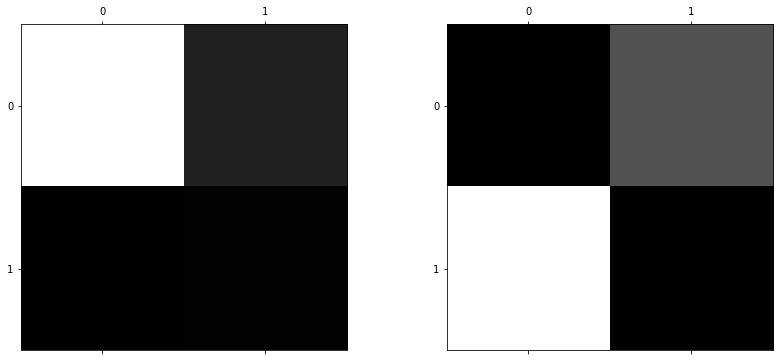

In [41]:
row_sums = cm.sum(axis = 1, keepdims = True)
norm_cm = cm / row_sums
np.fill_diagonal(norm_cm, 0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

ax1.matshow(cm, cmap = plt.cm.gray)
ax2.matshow(norm_cm, cmap = plt.cm.gray)

plt.show()